<a href="https://colab.research.google.com/github/casjunior93/Tera---Desafio-de-classificacao/blob/main/TERA_Desafio_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio de Detecção e Redução de Fraudes no Setor Financeiro**

O desafio é propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa de crédito em que trabalho e garantir margens saudáveis.

Link do dataset: https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view

Vou começar importando as bibliotecas iniciais:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Agora importo os dados:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Tera/DESAFIO CLASSIFICAÇÃO/fraud_detection_dataset.csv')

Visualizo as dimensões do dataframe:

In [3]:
df.shape

(6362620, 11)

Vou retornar 10 linhas aleatórias para visualizar o dataframe:

In [4]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5712977,398,TRANSFER,441641.76,C431300544,0.00,0.00,C44076641,481844.26,923486.02,0,0
2835687,226,PAYMENT,12783.90,C492393705,0.00,0.00,M1492014014,0.00,0.00,0,0
1841550,163,CASH_OUT,278267.48,C185198687,44493.00,0.00,C1926625466,204505.92,788127.15,0,0
5040984,354,CASH_IN,84724.44,C1454660708,29751.00,114475.44,C1910622874,7811090.44,7726366.00,0,0
5327646,374,PAYMENT,19705.58,C839355542,0.00,0.00,M1707782519,0.00,0.00,0,0
3526696,259,PAYMENT,9543.03,C1915468487,9716.73,173.70,M1016621399,0.00,0.00,0,0
4862901,348,CASH_IN,147944.93,C1491957670,4036304.15,4184249.08,C1781410358,2155717.94,2007773.01,0,0
1069751,122,CASH_OUT,201240.41,C2123459239,12583.62,0.00,C529216112,244676.38,445916.79,0,0
4836369,347,CASH_OUT,22723.31,C782700924,0.00,0.00,C929452805,5258895.36,5281618.67,0,0
1965063,178,PAYMENT,9635.60,C1414478552,35395.00,25759.40,M468300254,0.00,0.00,0,0


## Conhecendo as features deste dataset:

* `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

* `type` - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

* `amount` - Quantia: total que foi transacionado;

* `nameOrig` - ClienteOrigem: cliente que iniciou a transação

* `oldbalanceOrg` - SaldoInicialOrigem: saldo da conta de origem antes da transação;

* `newbalanceOrig` - SaldoFinalOrigem: saldo da conta de origem após a transação;

* `nameDest` - ClienteDestino: cliente de destino da transação;

* `oldbalanceDest` - SaldoInicialDestino: saldo da conta de destino antes da transação;

* `newbalanceDest` - SaldoFinalDestino: saldo da conta de destino após a transação;

* `isFraud` - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

* `isFlaggedFraud` - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

# Pré-análise dos dados com SeetViz

Primeiro vou renomear as tabelas para facilitar a análise.

In [5]:
df = df.rename(
    columns={"step":"totalHoras", "type": "tipoTransacao", "amount": "quantia",
             "nameOrig": "clienteOrigem", "oldbalanceOrg": "saldoInicialOrigem",
             "newbalanceOrig": "saldoFinalOrigem", "nameDest": "clienteDestino",
             "oldbalanceDest": "saldoInicialDestino", "newbalanceDest": "saldoFinalDestino",
             "isFraud": "ehFraude", "isFlaggedFraud": "sinalizadaComoFraude"

             })
df.head(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


Agora importo o SweetViz

In [6]:
!pip install sweetviz
import sweetviz

O SeetViz gera um relatório em HTML com várias informações sobre as features do dataset.

In [7]:
#analise=sweetviz.analyze(df)
#analise.show_html()

Ao analisar o relatório do SweetViz, vi que o dataset tem 3 features categóricas (tipoTransacao, ehFraude e sinalizadaComoFraude), 6 numéricas (totalHoras, quantia, saldoInicialOrigem, saldoFinalOrigem, saldoInicialDestino e saldoFinalDestino) e 2 textuais (clienteOrigem, clienteDestino). Nenhuma feature tem valores faltantes.

# Tratamento de Dados

Vou tratar a feature categórica tipoTransacao com o método get_dummies do Pandas.

In [8]:
df.tipoTransacao.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df2 = pd.get_dummies(df.tipoTransacao)

A coluna tipoTransacao tem 5 valores únicos. Com o método get_dummies será criado uma coluna em um novo dataframe para cada valor único. Para cada transação, o tipo dessa transação vai receber o valor 1.

In [10]:
df2.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


Agora concateno o df2 com o dataframe original df.

In [11]:
df3 = pd.concat([df, df2], axis='columns')
df3.sample(10)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
4008141,298,PAYMENT,14086.63,C175504196,75999.51,61912.87,M1417934307,0.00,0.00,0,0,0,0,0,1,0
5795963,401,PAYMENT,47652.69,C79575408,7039.00,0.00,M874475272,0.00,0.00,0,0,0,0,0,1,0
4305924,307,PAYMENT,20741.00,C1903006453,187.00,0.00,M664006534,0.00,0.00,0,0,0,0,0,1,0
3137788,236,CASH_OUT,17800.33,C608894226,36674.00,18873.67,C482341331,309969.85,327770.19,0,0,0,1,0,0,0
1157242,131,CASH_IN,2124.69,C6088208,2863520.85,2865645.54,C2140290946,396673.01,394548.32,0,0,1,0,0,0,0
331908,16,CASH_IN,46985.54,C1438085051,19908.00,66893.54,C1625001118,0.00,0.00,0,0,1,0,0,0,0
1050860,95,CASH_IN,30789.94,C841021739,2548221.60,2579011.54,C526997132,357964.07,327174.13,0,0,1,0,0,0,0
3615797,273,TRANSFER,455946.38,C801057689,327534.00,0.00,C1424436482,0.00,455946.38,0,0,0,0,0,0,1
5060333,354,PAYMENT,20459.22,C1950403398,7980.00,0.00,M117064848,0.00,0.00,0,0,0,0,0,1,0
5384122,376,CASH_OUT,289531.94,C1548725111,0.00,0.00,C1876418327,14384332.27,14673864.21,0,0,0,1,0,0,0


Agora vou dropar a coluna tipoTransacao.

In [12]:
#df3.drop('tipoTransacao', axis='columns', inplace=True)
df3.sample(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1709091,160,CASH_IN,296795.74,C898697011,2058560.33,2355356.07,C1516493171,1594173.01,1297377.27,0,0,1,0,0,0,0
16032,8,PAYMENT,17706.53,C1881911311,0.00,0.00,M105292474,0.00,0.00,0,0,0,0,0,1,0
822409,40,PAYMENT,21338.74,C2059172498,638476.69,617137.95,M1954043290,0.00,0.00,0,0,0,0,0,1,0


E renomear as novas colunas

In [13]:
df3 = df3.rename(
    columns={"CASH_IN":"deposito", "CASH_OUT": "saque", "DEBIT": "debito",
             "PAYMENT": "pagamento", "TRANSFER": "transferencia",
             })
df3.head(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1


# Análise exploratória dos dados

In [14]:
import seaborn as sns

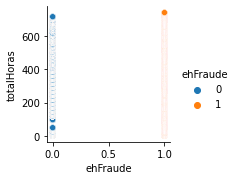

In [16]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['totalHoras'], hue='ehFraude');

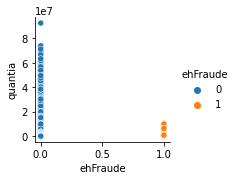

In [17]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['quantia'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=[ 'saldoInicialOrigem'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=[ 'saldoFinalOrigem'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saldoInicialDestino'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saldoFinalDestino'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['sinalizadaComoFraude'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['deposito'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saque'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['debito'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['pagamento'], hue='ehFraude');

In [ ]:
sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['transferencia'], hue='ehFraude');